In [ ]:
## Section 01:Data cleaning and Exploratory Data Analysis
Must have:
1. Explore dataset features?
2. Create new features if needed?
3. Are there any null values or outliers, replacing NaN values if needed?

## Section 02: Statistical Analysis
1. Compute some statistics

## Section 03: Data Visualization
Good to have:

1. Please plot and visualize
2. Create static and dynamic visualization to tell a story
3. Dashboard: Make a dashboard with Dash library (or Sreamlit library)
Comment on each step, tell a story, the notebook should be a report

## Section 04: Machine learning

2. Machine Learning Model: Choose a target column of the dataset,
3. split the dataset between training data and test data, and train a simple machine learning model

![image.png](attachment:image.png)


## =========#Loading the required libraries==============

In [396]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import date
import plotly.graph_objects as go # creates plots
import numpy as np # standard for data processing
import pandas as pd # standard for data processing
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.offline as pyo
from sklearn import preprocessing
import plotly.express as px

## ==============#Loading the raw dataset================

In [354]:
df_m = pd.read_csv("marketing_data.csv")
df_m.head(5)
df_m.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [355]:
print(f'No. of rows in the dataset: {df_m.shape[0]}\nNo. of columns in the dataset: {df_m.shape[1]}')

No. of rows in the dataset: 2240
No. of columns in the dataset: 28


There are 2240 observation and 28 features.

## =================Data cleaning=======================

In [356]:
df_m.info()#To get information about the data and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Observations

1. There are 5 categorical features (object) and 23 numerical features
2. Income is under object datatype - need to change it into numerical feature
3. Dt_Customer is under object datatype - need to convert to date type
4. There is spaces in Income column names
5. Removed the $ sign from Income column

In [357]:
df_m.columns = df_m.columns.str.strip() #This allows me to get rid of the spaces in the all headers in my dataframe
#df_m.rename(columns = {" Income ":"Income"},inplace = True)
df_m["Income"] = df_m["Income"].str.replace(",","")#To remove the common from the Income
df_m["Income"] = df_m["Income"].str.replace("$","")#To remove the dollar 
df_m["Income"] = df_m["Income"].astype("float")#Convert the object to float
df_m["Dt_Customer"] = pd.to_datetime(df_m["Dt_Customer"])#Convert the Dt_Customer to datetime

<ipython-input-357-57fc3c2d51bd>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [358]:
df_m.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Renaming some columns name and extract year name from date column

In [359]:
df_m.rename(columns={"Dt_Customer":"Date_Customer"},inplace =True)
df_m.rename(columns={"Kidhome":"Kids"},inplace =True)
df_m.rename(columns={"Teenhome":"Teens"},inplace =True)
#Define a function to change the country name from abbrevate to real name.
def replace_country_name(x):
    country =x['Country']
    for i in range(len(country)):
        if country[i] == 'SP':
            country[i] = 'Spain'
        elif country[i] == 'ME':
            country[i] = 'Montenegro'
        elif country[i] == 'IND':
            country[i] ='India'
        elif country[i] == 'CA':
            country[i] = 'Canada'
        elif country[i] == 'AUS':
            country[i] ='Australia'
        elif country[i] == 'GER':
            country[i] ='Germany'
        elif country[i] == 'US':
            country[i]='United State'
        else:
            country[i]='South Africa'
    x['Country'] = country
        
    return x
df_m = replace_country_name(df_m)




<ipython-input-359-cc2fa7d3a6f4>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-359-cc2fa7d3a6f4>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-359-cc2fa7d3a6f4>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-359-cc2fa7d3a6f4>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [360]:
#Checking the statitics summary of the features
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kids,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teens,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Are there any null values or outliers

In [361]:
#checking for NAs values from the data frame
missing_value = df_m.isna().sum().reset_index()
missing_value.columns = ['features', 'total_missing']
missing_value['percent'] = (missing_value['total_missing'] / len(df_m)) * 100
missing_value.index = missing_value['features']
del missing_value['features']
missing_value.T


features,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teens,Date_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
total_missing,0.0,0.0,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the Income there are 24 NA values of 1%.

### Checking for outlier

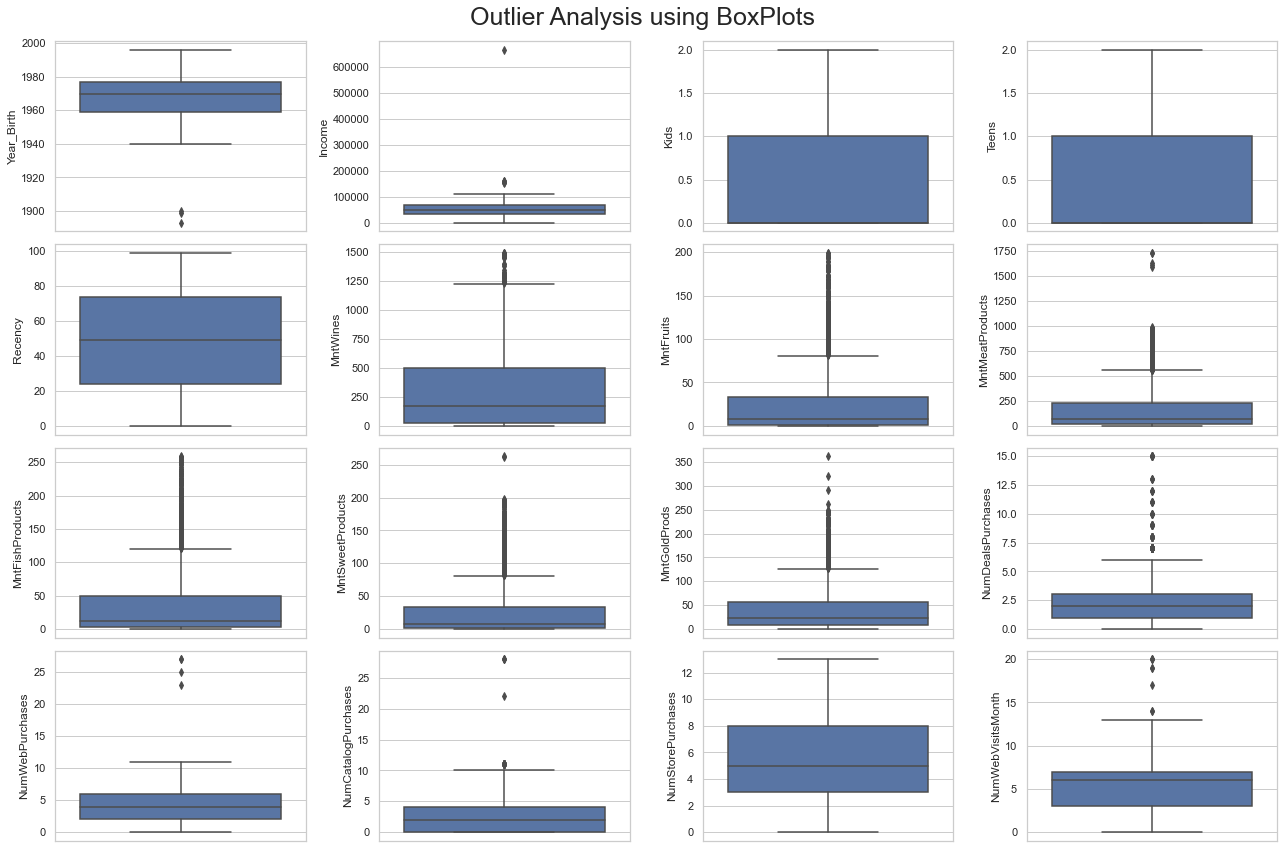

In [362]:
#Using list comprehension
cols_to_check = [col for col in df_m.columns 
                 if (df_m[col].dtype != 'object') & (df_m[col].nunique() > 2) &
                 (col != 'ID')&(col != 'Date_Customer')]

fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (18, 12))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(y = df_m[c], ax = ax[i])
    sns.set_theme(style="whitegrid")
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 25) 
fig.tight_layout()


In [363]:
#There are few outlier in Income column and outlier in Year_Birth so I need to remove it 

In [364]:
#Checking the outlier using for Zscore method since the Year_Birth have the outlier in lower limit
year_outliers = df_m['Year_Birth'][df_m['Year_Birth'] < df_m['Year_Birth'].mean() - 3 * df_m['Year_Birth'].std()]
year_outliers

513     1893
827     1899
2233    1900
Name: Year_Birth, dtype: int64

There are 3 outliers values shown above

In [365]:
#Checking the outlier using for Zscore method since the Income have the outlier in upper
income_outliers = df_m['Income'][df_m['Income'] > df_m['Income'].mean() + 3 * df_m['Income'].std()]
income_outliers

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

1. There are 8 outliers values as shown above

## How will you handle NAs values and outliers ?

In [366]:
print(df_m["Income"].mean())
print(df_m["Income"].median())

52247.25135379061
51381.5


In [367]:
#Replacing the NAs with median values
df_m["Income"] =df_m["Income"].fillna(51381.5)

print(f'Number of Null values in *Income* after replacement: {df_m["Income"].isna().sum()}')

Number of Null values in *Income* after replacement: 0


In [368]:
# Remove the income outlier 
#since the anomalies values are between 200000 and 600000
df_m[df_m.Income>200000]# There is one row that contain the outlier


,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teens,Date_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,South Africa


<AxesSubplot:ylabel='Income'>

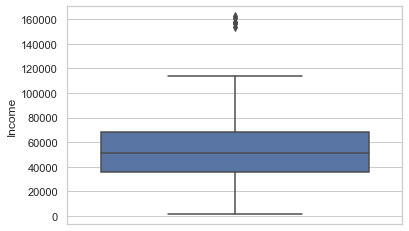

In [369]:
df_m = df_m.drop(df_m.index[527])#drop the row
sns.boxplot(y=df_m['Income'])#After removing the outliers

In [370]:
# Remove the Year_Birth outlier 
#since the anomalies values are between 1940 and 1990
df_m[df_m.Year_Birth<1940].index

Int64Index([513, 827, 2233], dtype='int64')

<AxesSubplot:ylabel='Year_Birth'>

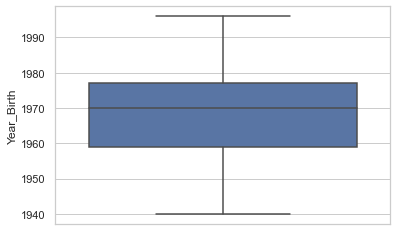

In [371]:
df_m = df_m.drop(df_m[df_m.Year_Birth<1940].index)#drop the row
sns.boxplot(y=df_m['Year_Birth'])#After removing the outliers

# ==================Analysis==============

## Createing a new variables


In [372]:
#Creating age column to know the income by the age
df_m["Year_Birth"] = df_m["Year_Birth"].astype('str')
def calculate_age(born):
        born = datetime.strptime(born, "%Y").date()
        today = date.today()
        return today.year - born.year 

df_m['Age'] = df_m['Year_Birth'].apply(calculate_age)
df_m['Age']

0       51
1       60
2       63
3       54
4       32
        ..
2235    45
2236    44
2237    45
2238    43
2239    52
Name: Age, Length: 2236, dtype: int64

In [373]:
#Calculating the total amount spent 
## creating the Totalspent per househood and the ratio of the total spent
Mtn_cols = [col for col in df_m.columns if 'Products' in col]
df_m["TotalSpent"]= df_m[Mtn_cols].sum(axis=1)
df_m["Ratio"] = df_m.apply(lambda row: row.TotalSpent/row.Income,axis=1)#ratios of the Amount and Income 

## creating the total no of children in the househoold
df_m["Noofchildren"] =df_m.apply(lambda row: row.Teens + row.Kids,axis=1)

# creating the total number of purchases
purchases_cols = [col for col in df_m.columns if 'Purchases' in col]
df_m['Totalpurchases']=df_m[purchases_cols].sum(axis=1)

#creating the total number of the campaign
df_m['Totalcmp']=df_m.apply(lambda row:row.AcceptedCmp1 + row.AcceptedCmp2 +row.AcceptedCmp3+row.AcceptedCmp4 +row.AcceptedCmp5 + row.Response,axis=1)


In [374]:
df_m.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids',
       'Teens', 'Date_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'TotalSpent',
       'Ratio', 'Noofchildren', 'Totalpurchases', 'Totalcmp'],
      dtype='object')

# ===============Visualisation=======================

In [375]:
#Visualise the country that has the highest Income
groupped_country = df_m.groupby(by='Country',as_index=False).sum()
px.bar(groupped_country,x='Country',y='Income',orientation ='v', title="Income by Country")

In [376]:
groupped_country = df_m.groupby(by='Country',as_index=False).sum()
px.bar(groupped_country,x='Country',y='TotalSpent',orientation ='v', title="Total Expenditure by Country")

## Observation:
From the above bar chat shown that Spain has the higest Income and the highest Totl Expenditure follow by South Africa and Montengo has the least Income and Total Expenditure.

In [333]:
           
fig = px.scatter(df_m, x="TotalSpent", y="Income", color="Education",labels=dict(Income='Income ($)',tip='Tip ($)',
                                        TotalSpent='Total Expenditure ($)'),title="Total amount spend by Education")
fig.show()

In [334]:
import plotly.graph_objects as go


# Use `hole` to create a donut-like pie chart
fig = px.pie(df_m, names='Marital_Status', values='TotalSpent',hole=.3)
fig.show()

In [335]:
df_m.columns
df_m['Noofchildren'].unique()

array([0, 1, 2, 3], dtype=int64)

In [336]:
df_mpurchase=df_m.iloc[:,15:19]
px.box(df_mpurchase,range_y=[0,20] ,labels=dict(variable='Purchases',
                                        value='Number'),title="Number of purchases")

In [337]:

px.box(df_m.iloc[:,9:15],range_y =[0,1300],labels=dict(variable='Different products',
                                        value='Amount spent'),title="Amount spent by different product")
#df_mamount

In [338]:
df_m['Noofchildren'] = df_m['Noofchildren'].replace({0:'Zero',1:'One',2:'Two',3:'Three'})
fig = px.box(df_m, y="TotalSpent", x="Noofchildren",labels=dict(Income='Income ($)',tip='Tip ($)',
                                        TotalSpent='Total Expenditure ($)'),title="Total amount spend by Education")
fig.show()

In [339]:
Mtnproduct=pd.DataFrame(df_m[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].mean()*100, 
                           columns=['Percent']).reset_index()
Mtnproduct

,index,Percent
0,MntWines,30412.745975
1,MntFruits,2627.593918
2,MntMeatProducts,16698.345259
3,MntFishProducts,3753.622540
4,MntSweetProducts,2708.050089
5,MntGoldProds,4398.300537


In [340]:
fig = px.bar(Mtnproduct,x='Percent',y='index',labels=dict(index='Different products',
                                        percent='Expenditure'),title="Expenditure by different product")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

In [341]:

# calculate success rate (percent accepted)
camp_success = pd.DataFrame(df_m[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
camp_success

,index,Percent
0,AcceptedCmp1,6.440072
1,AcceptedCmp2,1.341682
2,AcceptedCmp3,7.289803
3,AcceptedCmp4,7.468694
4,AcceptedCmp5,7.245081
5,Response,14.937388


In [342]:

# plot
fig = px.bar(camp_success,x='Percent',y='index',labels=dict(index='Campaign',
                                     Percent='Accepted (%)'),title="Marketing campaign success rate")
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

# ============Model============================

In [447]:
df_new = df_m.select_dtypes(exclude='object')
df_new=df_new.drop(['ID','Date_Customer','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp2', 'Response', 'Complain', 'Age', 'TotalSpent', 'Ratio', 'Totalpurchases', 'Totalcmp','AcceptedCmp5', 'AcceptedCmp1', 'Noofchildren'], axis=1)


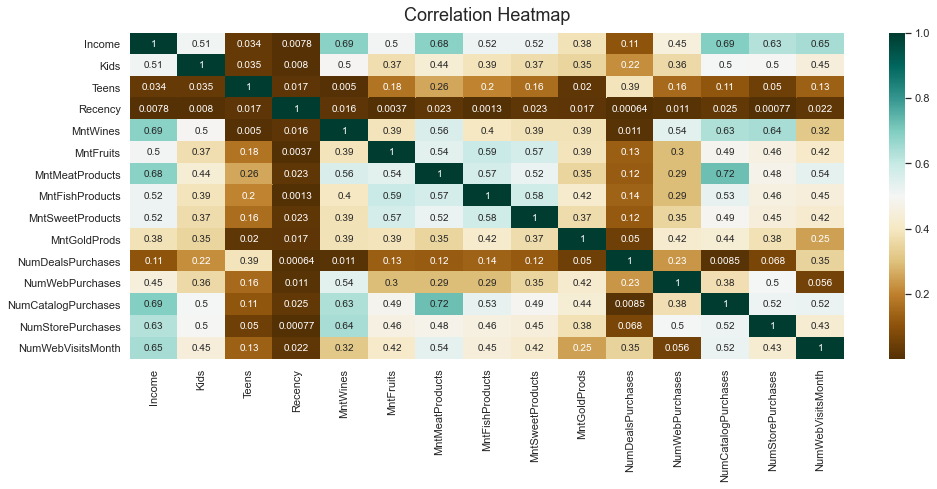

In [448]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(np.abs(df_new.corr()), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


In [464]:
###########################################################
# Build ML regression model by extracting the features
###########################################################
df_new_select = df_new.loc[:,['NumCatalogPurchases','NumStorePurchases','MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','Income','NumWebVisitsMonth','MntSweetProducts']]

In [465]:
# Prepare data for ML training 
df_train, df_test = train_test_split(df_new_select,test_size = 0.3)

In [1]:
#########################
# Creating Input and the output for machine learning ML model 
#########################
X_train = df_train.loc[:,['Income','NumCatalogPurchases','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts','MntSweetProducts','NumWebVisitsMonth']].values
y_train = df_train.loc[:,'MntMeatProducts'].values
X_test = df_test.loc[:,['Income','NumCatalogPurchases','MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts', 'MntSweetProducts','NumWebVisitsMonth']].values
y_test = df_test.loc[:,'MntMeatProducts'].values


NameError: name 'df_train' is not defined

In [537]:
###################
#MaxMinscaling
# scaling my features by using normalizedscaling because I have some larger values between the features
######################
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax.shape

(1565, 8)

In [538]:
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_test_minmax.shape

(671, 8)

In [539]:
min_max_scaler.scale_

array([6.41013314e-06, 3.57142857e-02, 7.17360115e-04, 5.18134715e-03,
       5.80046404e-04, 3.86100386e-03, 3.80228137e-03, 5.00000000e-02])

In [540]:
min_max_scaler.min_

array([-0.01108953,  0.        ,  0.        ,  0.        , -0.00058005,
        0.        ,  0.        ,  0.        ])

In [541]:
##############################
#DecisionTreeRegressor
##############################
dt_model = DecisionTreeRegressor(criterion='mse',splitter='best',)
dt_model.fit(X=X_train,y=y_train)#training my model
y_test_predicted_dt = dt_model.predict(X_test)
report_dt = dt_model.score(X_test,y_test)
ypred=dt_model.predict(X_test)
print(ypred)
print(y_test)
print("DecisionTreeRegressor")
print('predict model for MtnMeatProducts')
print(report_dt)


DecisionTreeRegressor
predict model for MtnMeatProducts
0.999214638268536


In [518]:
##################################
#=======Muliple Linear Regression MtnMeatProduct
####################################
lr_model = LinearRegression()
lr_model.fit(X=X_train,y=y_train)
y_test_predicted = lr_model.predict(X_test)
report_lr = lr_model.score(X_test,y_test)
predy = lr_model.predict(X_test)
print(predy)
print(y_test)
print("Linear_Regression")
print('Predict model for MtnMeatProducts')
print(report_lr)
px.line(nn_model.loss_curve_)

[5.000e+02 5.000e+00 1.100e+01 4.490e+02 5.000e+00 2.170e+02 2.800e+01
 4.690e+02 5.590e+02 1.000e+01 5.050e+02 4.300e+01 3.450e+02 1.130e+02
 1.080e+02 2.500e+01 1.710e+02 1.300e+01 2.200e+01 6.900e+01 1.710e+02
 8.000e+00 3.670e+02 1.080e+02 1.800e+01 1.300e+01 8.300e+01 1.400e+01
 1.100e+01 4.300e+01 7.060e+02 1.300e+01 7.000e+00 9.300e+01 1.420e+02
 2.400e+02 4.400e+01 1.440e+02 1.370e+02 4.400e+01 1.300e+01 7.310e+02
 1.000e+01 2.400e+01 1.100e+01 1.240e+02 7.300e+01 1.000e+01 5.200e+01
 5.000e+00 4.640e+02 1.600e+01 1.000e+01 8.300e+01 2.700e+01 1.780e+02
 1.330e+02 2.000e+00 6.800e+01 9.000e+01 9.900e+01 2.260e+02 8.270e+02
 1.700e+01 3.800e+01 4.800e+01 8.200e+01 7.470e+02 1.700e+02 3.100e+01
 2.170e+02 3.200e+01 1.780e+02 1.200e+01 8.400e+01 1.100e+01 2.670e+02
 3.300e+01 8.000e+00 9.000e+00 5.100e+01 1.940e+02 9.000e+00 2.100e+01
 6.110e+02 2.570e+02 2.130e+02 9.000e+00 4.070e+02 3.840e+02 3.500e+01
 2.100e+01 4.500e+02 2.320e+02 1.300e+02 2.230e+02 5.000e+00 2.500e+01
 2.720

In [542]:
#######################################################
# Multi-Layer Perceptron (MLP) Model for MtnMeatProduct
#######################################################
from sklearn.metrics import r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(200,100),max_iter=5000, verbose=False, tol=0.0000001,early_stopping=False,).fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = nn_model.score(X_test,y_test)
print("Multi-Layer Perceptron")
print('predict model for MtnMeatProducts')
print(report_nn)
px.line(nn_model.loss_curve_)

Multi-Layer Perceptron
predict model for Numcatalogpurchase
0.9907940907239022


In [ ]:
#Comparing the three model above,we can see that the three predict it well for the Amount spent on meat product.The R^2 have the predict of 1.0,0.99 and 0.99 each model representively.

In [559]:
###########################################
# Training ML model for NumcatalogPurchase
###########################################
X_train = df_train.loc[:,['Income','MntMeatProducts','MntFishProducts','MntWines','NumWebVisitsMonth']].values
y_train = df_train.loc[:,'NumCatalogPurchases'].values
X_test = df_test.loc[:,['Income','MntMeatProducts','MntFishProducts','MntWines','NumWebVisitsMonth']].values
y_test = df_test.loc[:,'NumCatalogPurchases'].values

In [560]:
############################
#MaxMinscaling
############################
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax.shape

(1565, 5)

In [561]:
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_test_minmax.shape

(671, 5)

In [555]:
##############################
#DecisionTreeRegressor
##############################
dt_model = DecisionTreeRegressor(criterion='mse',splitter='best',)
dt_model.fit(X=X_train,y=y_train)
y_test_predicted_dt = dt_model.predict(X_test)
report_dt = dt_model.score(X_test,y_test)
print("DecisionTreeRegressor")
print('predict model for NumCatalogPurchases')
print(report_dt)


DecisionTreeRegressor
predict model for NumCatalogPurchases
0.43526139667932784


In [562]:
##################################
#=======Muliple Linear Regression MtnMeatProduct
####################################
lr_model = LinearRegression()
lr_model.fit(X=X_train,y=y_train)
y_test_predicted = lr_model.predict(X_test)
report_lr = lr_model.score(X_test,y_test)
predy = lr_model.predict(X_test)
print(predy)
print(y_test)
print("Linear_Regression")
print('Predict model for total_room')
print(report_lr)
px.line(nn_model.loss_curve_)

[ 6.02095624  0.85863085  0.71062297  5.7600157  -0.15774034  3.84951961
  1.39621092  4.51747453  5.27917203  1.01497823  6.74453282  1.77148264
  5.61358957  4.04183214  1.48336722  0.68526152  4.13023674  0.4445384
  0.64353154  1.9340826   1.73139266  0.31964949  4.7922397   4.99047082
  0.41680694  1.18566824  2.28813318  0.62585957  0.73026617  1.66493122
  6.66394832  0.84488496  0.12319068  2.07129657  3.2583846   4.36058396
  0.62225147  4.21302139  1.67036086  1.73620693  0.19752481  7.32177185
  0.12047858  0.84222604  0.6843626   3.57030882  1.70716098  0.31848595
  1.31116664  0.65374316  6.89807343  0.35216201  1.29332576  3.14436992
  1.48098088  2.58813699  3.07903992  0.66191186  0.70894862  2.44305323
  2.73189391  4.64457347  7.34716362  0.4182037   1.76081442  0.97991463
  1.46368332  7.07661895  3.50683836  0.97209206  4.01110756  2.48111751
  3.49294027  0.54164778  2.8622124  -0.02195856  2.88433692  1.24245948
  0.17783875  0.01377027  1.4278376   3.62598804  1.

In [563]:
#######################################################
# Multi-Layer Perceptron (MLP) Model for MtnMeatProduct
#######################################################
from sklearn.metrics import r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(200,100),max_iter=5000, verbose=False, tol=0.0000001,early_stopping=False,).fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = nn_model.score(X_test,y_test)
print("Multi-Layer Perceptron")
print('predict model for Numcatalogpurchase')
print(report_nn)
px.line(nn_model.loss_curve_)

Multi-Layer Perceptron
predict model for Numcatalogpurchase
-1.5159975248416564


In [ ]:
px.

In [42]:
df_m["Income"].dtype

dtype('float64')